## 1. Introduction to K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm that partitions data into `K` clusters, where each data point belongs to the cluster with the nearest mean.

### Applications:
- Customer Segmentation
- Anomaly Detection
- Image Segmentation
- Document Clustering

## 2. How K-Means Works

### Algorithm Steps:
1. Select the number of clusters (K).
2. Initialize K centroids randomly.
3. Assign each data point to the nearest centroid.
4. Compute new centroids as the mean of assigned points.
5. Repeat steps 3 and 4 until convergence.

## 3. Choosing the Right K

- **Elbow Method**: Plots WCSS vs. K and selects the 'elbow' point. (within-cluster sum of squares)
- **Silhouette Score**: Measures how similar a point is to its own cluster vs. other clusters.

### 1. Cluster
A group of similar things.

---

### 2. Centroid
The center point of a cluster. It's the average position of all points in that cluster.

---

### 3. K (Number of Clusters)
How many groups you want.

For example, if you want to divide your customers into 3 types (low, medium, high spenders), then `k = 3`.

---

### 4. Iterations
How many times the algorithm runs to improve the clusters. It moves centroids and reshuffles points again and again, until it finds the best arrangement.

---

### 5. WCSS (Within-Cluster Sum of Squares)
Total distance from points to their cluster center. Lower WCSS means better grouping. It shows how compact the clusters are.

---

### 6. Elbow Method
A method to find the best `k`. Try different `k` values, plot WCSS, and look for the “elbow” in the graph — where WCSS stops decreasing fast.

---

### 7. Inertia
Same as WCSS. In code, you often see `.inertia_`. It means the total WCSS.

---

### 8. Random Initialization
Starting with random centroids. The algorithm randomly picks `k` points to begin clustering, then improves from there.

---

### 9. Convergence
When the clusters stop changing. Means the algorithm is done. Centroids and points don’t move anymore — clustering is finished.


## 4. Example Use Case: Customer Segmentation

### Dataset: Kaggle's Mall Customer Segmentation Data
We will use the dataset containing customer annual income and spending score to segment customers into different groups.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

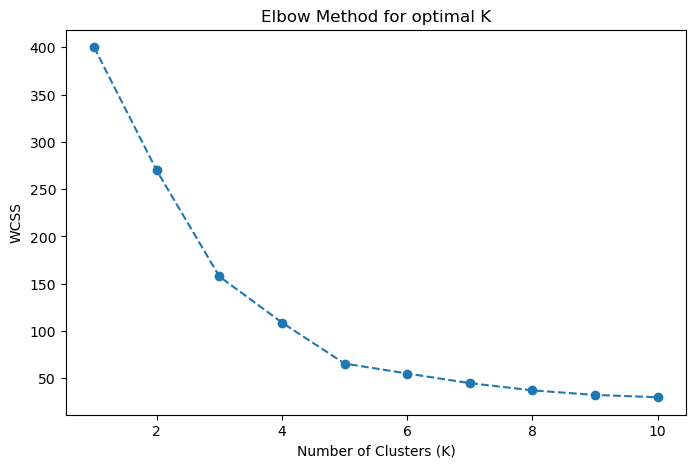

In [4]:
#standardinzing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Finding optional k unisng Elbow Method
wcss = [] #inetria
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values,wcss,marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for optimal K")
plt.show()

From above graph 5 is an elbow point as graph starts to chnage from this point.

**What is WCSS?**

WCSS (Within-Cluster Sum of Squares) measures the total variance within clusters. It is calculated as:

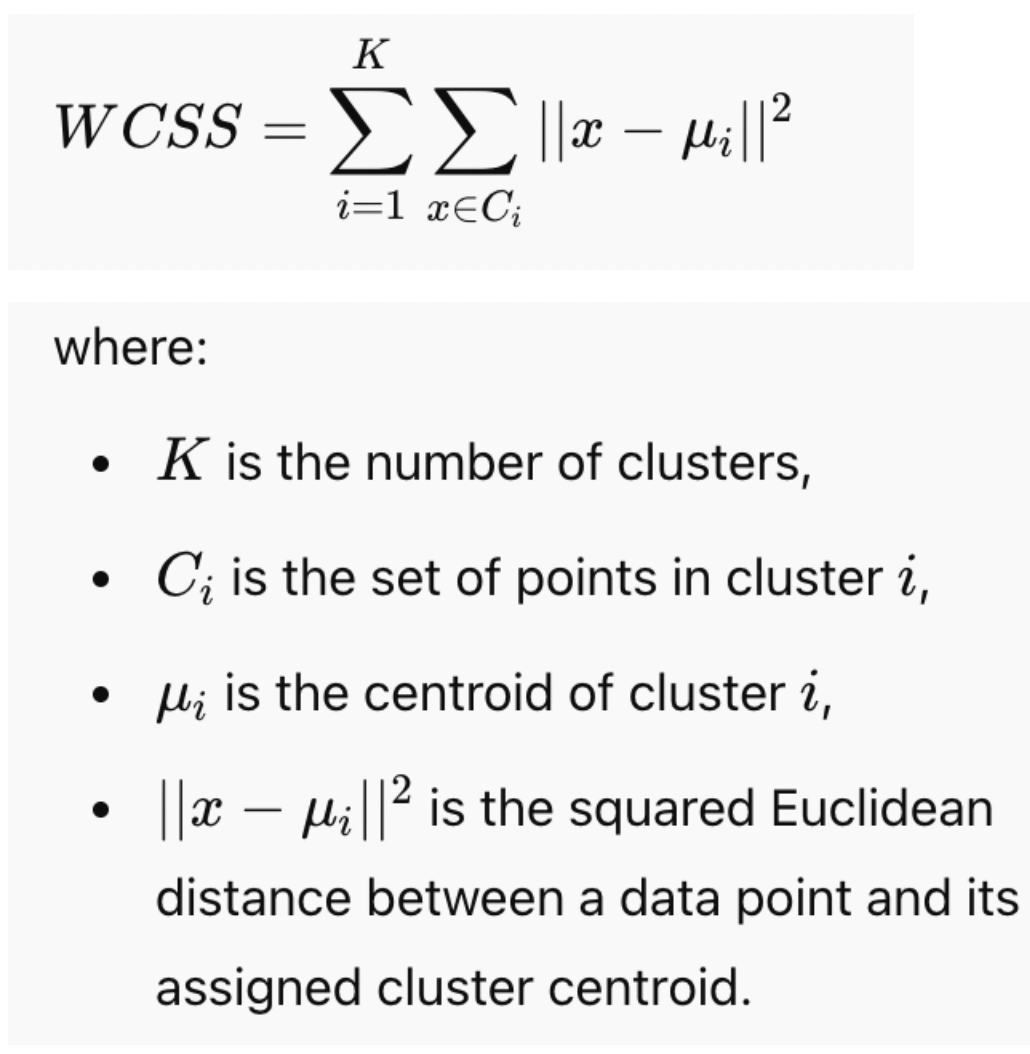

As 𝐾 increases, WCSS decreases because clusters become smaller and more compact

**Why Do We Select the Elbow Point?**

- The elbow point is the value of 𝐾 where adding more clusters does not significantly reduce WCSS.
- Before the elbow point, WCSS decreases rapidly as adding clusters leads to more meaningful segmentation.
- After the elbow point, WCSS decreases at a much slower rate, indicating that additional clusters may lead to overfitting rather than meaningful separation.

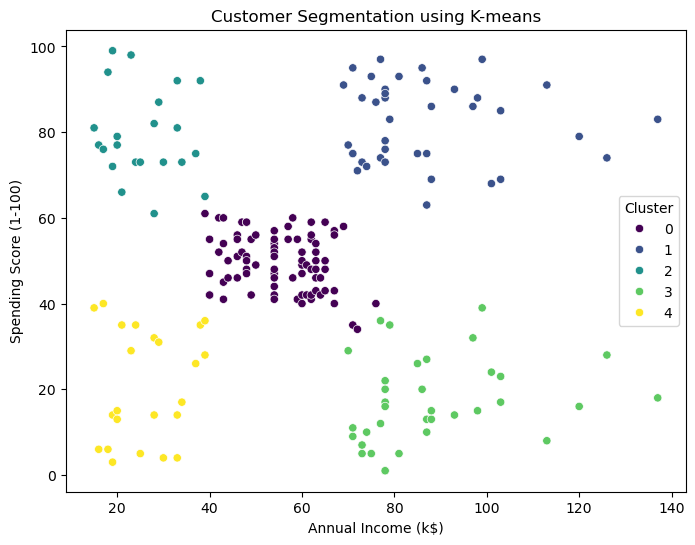

In [7]:
#Applying K-Means with K-5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#Visualizing Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.title("Customer Segmentation using K-means")
plt.show()

In [30]:
#New sample data point (Annual Income (k$)) = 50k, Spending Score = 60
#define where new_sample falls in group
sample = np.array([[50,60]])

#standardizing the new sample using the same scaled used for training data
new_sample_scaled = scaler.transform(sample)

#predicting thr cluster
predicted_cluster = kmeans.predict(new_sample_scaled)

print(f"The new customer belongs to Cluster: {predicted_cluster[0]}")



The new customer belongs to Cluster: 0


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Evaluation

## Silhouette Score

- Measures how well a data point fits within its assigned cluster compared to o
- ⁠The score ranges from -1 to 1, where:
- 1 → Perfect clustering (points are well separated).
- ⁠0 → Overlapping clusters (indistinct separation).
- ⁠-1 → Poor clustering (points assigned to wrong clusters).

In [32]:
#how we
silhoutte_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhoutte_avg:.2f}")

Silhouette Score: 0.55


 -  Good model: Score above 0.5
- Moderate Model:  Between 0.2 and 0.5
- Bad Model:  Below 0.2

# Elbow Method (WCSS)
## Davies-Bouldin Index (DBI)

- Measures the simalirity between clusters while considering cluster distances.
- Lower DBI values indicate better clustering (less overlap between clusters)

In [40]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi_score:.2f}")

Davies-Bouldin Index: 0.57


- Good Model: DBI Close to 0
- Bad Model: DBI above 1() higher means poor separation

# Cluster Visulization

- Good Clustering: Well-separated groups.
- Bad clustering: Overlapping or elongated clusters

# Cluster Size Distribution
If one cluster is much larger than other, the model might be biased.


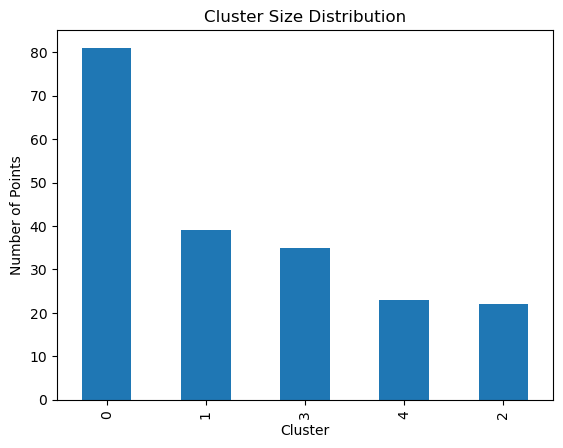

In [36]:
df['Cluster'].value_counts().plot(kind='bar', title='Cluster Size Distribution')
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()